In [ ]:
"""
Started on 9/10

Purpose: To test out the meshafterparty Decomposition
after we have added the new feature of limb splitting

"""

In [1]:
from os import sys
sys.path.append("/meshAfterParty/")

In [2]:
from importlib import reload
import os
from pathlib import Path
os.getcwd()

import neuron_utils as nru
nru = reload(nru)
import neuron
neuron=reload(neuron)
import neuron_visualizations as nviz
import time
import system_utils as su

# Regenerating the meshafterparty object

In [3]:
import trimesh_utils as tu
mesh_file_path = Path("/notebooks/test_neurons/multi_soma_example.off")
mesh_file_path.exists()
current_neuron_mesh = tu.load_mesh_no_processing(str(mesh_file_path.absolute()))

In [4]:
# picking a random segment id
segment_id = 12345
description = "double_soma_meshafterparty"

In [5]:
import soma_extraction_utils as sm

somas = sm.extract_soma_center(segment_id,
                                                 current_neuron_mesh.vertices,
                                                 current_neuron_mesh.faces)

Current Arguments Using (adjusted for decimation):
 large_mesh_threshold= 15000.0 
large_mesh_threshold_inner = 10000.0 
soma_size_threshold = 1250.0 
soma_size_threshold_max = 12000.0
outer_decimation_ratio = 0.25
inner_decimation_ratio = 0.25
IN INPUT FILE VALIDATION LOOP
LEAVING LOOP, MESH VALIDATED
Using port = 7288
xvfb-run -n 7288 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/meshAfterParty_saved/12345/neuron_12345.off -o /notebooks/meshAfterParty_saved/12345/neuron_12345_decimated.off -s /notebooks/meshAfterParty_saved/12345/decimation_meshlab_25416592.mls
Total found significant pieces before Poisson = [<trimesh.Trimesh(vertices.shape=(139795, 3), faces.shape=(284336, 3))>]
----- working on large mesh #0: <trimesh.Trimesh(vertices.shape=(139795, 3), faces.shape=(284336, 3))>
pre_largest_mesh_path = /notebooks/meshAfterParty_saved/12345/neuron_12345_decimated_largest_piece.off
IN INPUT FILE VALIDATION LOOP
LEAVING LOOP, MESH VALIDATED
Using port = 1681
xvfb-run -n 16

Total found significant pieces AFTER Poisson = [<trimesh.Trimesh(vertices.shape=(151133, 3), faces.shape=(302274, 3))>, <trimesh.Trimesh(vertices.shape=(42554, 3), faces.shape=(85104, 3))>]
----- working on mesh after poisson #0: <trimesh.Trimesh(vertices.shape=(151133, 3), faces.shape=(302274, 3))>
IN INPUT FILE VALIDATION LOOP
LEAVING LOOP, MESH VALIDATED
Using port = 7529
xvfb-run -n 7529 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/meshAfterParty_saved/12345/neuron_12345_decimated_largest_piece_poisson_largest_inner.off -o /notebooks/meshAfterParty_saved/12345/neuron_12345_decimated_largest_piece_poisson_largest_inner_decimated.off -s /notebooks/meshAfterParty_saved/12345/decimation_meshlab_25686687.mls
done exporting decimated mesh: neuron_12345_decimated_largest_piece_poisson_largest_inner.off
1) Starting: Mesh importing and Pymesh fix
loading mesh from vertices and triangles array
1) Finished: Mesh importing and Pymesh fix: 0.00026106834411621094
2) Staring: Generat

removed temporary input file: /notebooks/meshAfterParty_saved/Poisson_temp/neuron_725747.off
removed temporary output file: /notebooks/meshAfterParty_saved/Poisson_temp/neuron_725747_poisson.off
/notebooks/meshAfterParty_saved/Poisson_temp/poisson_309276.mls is being deleted....
Inside sphere validater: ratio_val = 2.7559125454571776
----- working on mesh after poisson #1: <trimesh.Trimesh(vertices.shape=(42554, 3), faces.shape=(85104, 3))>
IN INPUT FILE VALIDATION LOOP
LEAVING LOOP, MESH VALIDATED
Using port = 5462
xvfb-run -n 5462 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/meshAfterParty_saved/12345/neuron_12345_decimated_largest_piece_poisson_largest_inner.off -o /notebooks/meshAfterParty_saved/12345/neuron_12345_decimated_largest_piece_poisson_largest_inner_decimated.off -s /notebooks/meshAfterParty_saved/12345/decimation_meshlab_25686687.mls
done exporting decimated mesh: neuron_12345_decimated_largest_piece_poisson_largest_inner.off
1) Starting: Mesh importing and 

In [ ]:
# import system_utils as sua
# branch_skeleton_data = su.decompress_pickle("/notebooks/Platinum_Compartment/Axon/branch_skeletons_cleaned.pbz2")

In [6]:
import time
meshparty_time = time.time()
import compartment_utils as cu
cu = reload(cu)

import meshparty_skeletonize as m_sk
import preprocess_neuron as pn
pn = reload(pn)
m_sk = reload(m_sk)
import skeleton_utils as sk
sk = reload(sk)

somas = somas

nru = reload(nru)
neuron = reload(neuron)
current_neuron = neuron.Neuron(
    mesh=current_neuron_mesh,
    segment_id=segment_id,
    description=description,
    decomposition_type="meshafterparty",
    somas = somas,
    #branch_skeleton_data=branch_skeleton_data,
    suppress_preprocessing_print=False,
)
print(f"Total time for processing: {time.time() - meshparty_time}")





--- 0) Having to preprocess the Neuron becuase no preprocessed data
Please wait this could take a while.....





****** Phase A ***************





Soma List = [<trimesh.Trimesh(vertices.shape=(3065, 3), faces.shape=(6001, 3))>, <trimesh.Trimesh(vertices.shape=(2124, 3), faces.shape=(4205, 3))>]
soma_mesh_list_centers = [array([756862.7897553 , 959093.87004894, 874202.02264274]), array([864007.66209981, 994520.88554614, 859495.97886064])]
# total split meshes = 79
There were 78 pieces found after size threshold
# of non soma touching seperate meshes = 53
# of inside pieces = 25
# of soma containing seperate meshes = 1
meshes with somas = {0: [0, 1]}


----Working on soma-containing mesh piece {z}----

inside Soma subtraction
mesh pieces in subtact soma BEFORE the filtering inside pieces = [<trimesh.Trimesh(vertices.shape=(153985, 3), faces.shape=(308998, 3))>, <trimesh.Trimesh(vertices.shape=(87699, 3), faces.shape=(176251, 3))>, <trimesh.Trimesh(vertices.shape=(57751, 3), faces.shap

     Starting Calcification
Before mesh subtraction number of skeleton edges = 4177
Inside mesh subtraction, len(main_mesh_bbox_restricted.faces) = 308998



Total Mesh subtraction time = 81.8132



len_subgraphs AT BEGINNING of the loop


all graph is one component!

Total time for skeleton stitching = 1.817678689956665
The process was using a temp folder
Using Distance measure skeletal_distance



    Total time for skeleton and cleaning of branch 0: 57.13093400001526

    -- Working on branch 1--
     Starting Screened Poisson
IN INPUT FILE VALIDATION LOOP
LEAVING LOOP, MESH VALIDATED
Using port = 3620
xvfb-run -n 3620 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/meshAfterParty_saved/temp/None.off -o /notebooks/meshAfterParty_saved/temp/None_poisson.off -s /notebooks/meshAfterParty_saved/temp/poisson_425756.mls
-----Time for Screened Poisson= 22.806488037109375


     Starting Calcification
Before mesh subtraction number of skeleton edges = 2839
Inside mesh subtraction, len(main_mesh_bbox_restricted.faces) = 176251



Total Mesh subtraction time = 43.8461



len_subgraphs AT BEGINNING of the loop


all graph is one component!

Total time for skeleton stitching = 0.8663439750671387
The process was using a temp folder
Using Distance measure skeletal_distance



    Total time for skeleton and cleaning of branch 1: 23.144006490707397

    -- Working on branch 2--
     Starting Screened Poisson
IN INPUT FILE VALIDATION LOOP
LEAVING LOOP, MESH VALIDATED
Using port = 1312
xvfb-run -n 1312 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/meshAfterParty_saved/temp/None.off -o /notebooks/meshAfterParty_saved/temp/None_poisson.off -s /notebooks/meshAfterParty_saved/temp/poisson_360584.mls
-----Time for Screened Poisson= 23.80556082725525


     Starting Calcification
Before mesh subtraction number of skeleton edges = 1996
Inside mesh subtraction, len(main_mesh_bbox_restricted.faces) = 115799



Total Mesh subtraction time = 24.9809



len_subgraphs AT BEGINNING of the loop


all graph is one component!

Total time for skeleton stitching = 0.5611927509307861
The process was using a temp folder
Using Distance measure skeletal_distance



    Total time for skeleton and cleaning of branch 2: 10.393994569778442

    -- Working on branch 3--
     Starting Screened Poisson
IN INPUT FILE VALIDATION LOOP
LEAVING LOOP, MESH VALIDATED
Using port = 9634
xvfb-run -n 9634 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/meshAfterParty_saved/temp/None.off -o /notebooks/meshAfterParty_saved/temp/None_poisson.off -s /notebooks/meshAfterParty_saved/temp/poisson_567421.mls
-----Time for Screened Poisson= 19.14313530921936


     Starting Calcification
Before mesh subtraction number of skeleton edges = 1830
Inside mesh subtraction, len(main_mesh_bbox_restricted.faces) = 114738



Total Mesh subtraction time = 27.9329



len_subgraphs AT BEGINNING of the loop


all graph is one component!

Total time for skeleton stitching = 0.47089552879333496
The process was using a temp folder
Using Distance measure skeletal_distance



    Total time for skeleton and cleaning of branch 3: 10.446054220199585

    -- Working on branch 4--
     Starting Screened Poisson
IN INPUT FILE VALIDATION LOOP
LEAVING LOOP, MESH VALIDATED
Using port = 1278
xvfb-run -n 1278 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/meshAfterParty_saved/temp/None.off -o /notebooks/meshAfterParty_saved/temp/None_poisson.off -s /notebooks/meshAfterParty_saved/temp/poisson_885721.mls
-----Time for Screened Poisson= 19.06675958633423


     Starting Calcification
Before mesh subtraction number of skeleton edges = 1750
Inside mesh subtraction, len(main_mesh_bbox_restricted.faces) = 110120



Total Mesh subtraction time = 25.6635



len_subgraphs AT BEGINNING of the loop


all graph is one component!

Total time for skeleton stitching = 0.4528791904449463
The process was using a temp folder
Using Distance measure skeletal_distance



    Total time for skeleton and cleaning of branch 4: 10.064254999160767

    -- Working on branch 5--
     Starting Screened Poisson
IN INPUT FILE VALIDATION LOOP
LEAVING LOOP, MESH VALIDATED
Using port = 6870
xvfb-run -n 6870 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/meshAfterParty_saved/temp/None.off -o /notebooks/meshAfterParty_saved/temp/None_poisson.off -s /notebooks/meshAfterParty_saved/temp/poisson_704696.mls
-----Time for Screened Poisson= 16.347456216812134


     Starting Calcification
Before mesh subtraction number of skeleton edges = 1311
Inside mesh subtraction, len(main_mesh_bbox_restricted.faces) = 104070



Total Mesh subtraction time = 18.4944



len_subgraphs AT BEGINNING of the loop


all graph is one component!

Total time for skeleton stitching = 0.20575165748596191
The process was using a temp folder
Using Distance measure skeletal_distance



    Total time for skeleton and cleaning of branch 5: 5.25704550743103

    -- Working on branch 6--
     Starting Screened Poisson
IN INPUT FILE VALIDATION LOOP
LEAVING LOOP, MESH VALIDATED
Using port = 6345
xvfb-run -n 6345 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/meshAfterParty_saved/temp/None.off -o /notebooks/meshAfterParty_saved/temp/None_poisson.off -s /notebooks/meshAfterParty_saved/temp/poisson_678530.mls


-----Time for Screened Poisson= 13.01970362663269


     Starting Calcification
Before mesh subtraction number of skeleton edges = 1108
Inside mesh subtraction, len(main_mesh_bbox_restricted.faces) = 58765



Total Mesh subtraction time = 13.7517



len_subgraphs AT BEGINNING of the loop


all graph is one component!

Total time for skeleton stitching = 0.1931161880493164
The process was using a temp folder
Using Distance measure skeletal_distance



    Total time for skeleton and cleaning of branch 6: 3.456709384918213

    -- Working on branch 7--
     Starting Screened Poisson
IN INPUT FILE VALIDATION LOOP
LEAVING LOOP, MESH VALIDATED
Using port = 2903
xvfb-run -n 2903 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/meshAfterParty_saved/temp/None.off -o /notebooks/meshAfterParty_saved/temp/None_poisson.off -s /notebooks/meshAfterParty_saved/temp/poisson_429826.mls
-----Time for Screened Poisson= 14.943957805633545


     Starting Calcification
Before mesh subtraction number of skeleton edges = 1164
Inside mesh subtraction, len(main_mesh_bbox_restricted.faces) = 58576



Total Mesh subtraction time = 14.6254



len_subgraphs AT BEGINNING of the loop


all graph is one component!

Total time for skeleton stitching = 0.20592832565307617
The process was using a temp folder
Using Distance measure skeletal_distance



    Total time for skeleton and cleaning of branch 7: 3.8811402320861816

    -- Working on branch 8--
     Starting Screened Poisson
IN INPUT FILE VALIDATION LOOP
LEAVING LOOP, MESH VALIDATED
Using port = 4778
xvfb-run -n 4778 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/meshAfterParty_saved/temp/None.off -o /notebooks/meshAfterParty_saved/temp/None_poisson.off -s /notebooks/meshAfterParty_saved/temp/poisson_930923.mls


-----Time for Screened Poisson= 8.67893123626709
     Starting Calcification
Before mesh subtraction number of skeleton edges = 544
Inside mesh subtraction, len(main_mesh_bbox_restricted.faces) = 29598



Total Mesh subtraction time = 6.0164



len_subgraphs AT BEGINNING of the loop


all graph is one component!

Total time for skeleton stitching = 0.10181570053100586
The process was using a temp folder
Using Distance measure skeletal_distance



    Total time for skeleton and cleaning of branch 8: 0.9523892402648926

    -- Working on branch 9--
     Starting Screened Poisson
IN INPUT FILE VALIDATION LOOP
LEAVING LOOP, MESH VALIDATED
Using port = 9495
xvfb-run -n 9495 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/meshAfterParty_saved/temp/None.off -o /notebooks/meshAfterParty_saved/temp/None_poisson.off -s /notebooks/meshAfterParty_saved/temp/poisson_153873.mls


-----Time for Screened Poisson= 5.224503517150879
     Starting Calcification
file /notebooks/meshAfterParty_saved/temp/None_0_skeleton.cgal not found so skipping
No skeletons to stack so returning empty list
No recorded skeleton so skiipping to surface skeletonization



len_subgraphs AT BEGINNING of the loop


all graph is one component!

Total time for skeleton stitching = 0.02303290367126465
The process was using a temp folder
Using Distance measure skeletal_distance
no small end nodes to get rid of so returning whole skeleton
    Total time for skeleton and cleaning of branch 9: 0.0045359134674072266
Total time for skeletonization = 637.2841625213623





****** Phase B ***************






---- Working on Limb 0 ----
before cleaning limb size of skeleton = (4078, 2, 3)
Using Distance measure skeletal_distance
no small end nodes to get rid of so returning whole skeleton
after DISTANCE cleaning limb size of skeleton = (4078, 2, 3)
high-degree endpoints were connected so just using that connection
curr_branch = {2562}
After DECOMPOSITION cleaning limb size of skeleton = (4076, 2, 3)
Total time = 2.8655853271484375

---- Working on Limb 1 ----
before cleaning limb size of skeleton = (2898, 2, 3)
Using Distance measure skeletal_distance
no small end nodes to get rid of so returning whole ske

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
THERE WERE NO FACES THAT FIT THE DISTANCE (204.94612674095453) and Z transform requirements
So just skipping this edge

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: [0 1]

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


THERE WERE NO FACES THAT FIT THE DISTANCE (251.25901099531274) and Z transform requirements
So just skipping this edge
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
THERE WERE NO FACES THAT FIT THE DISTANCE (185.4030441000208) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (185.4030441000208) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (185.4030441000208) and Z transform requirements
So just skipping this edge

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
THERE WERE NO FACES THAT FIT THE DISTANCE (368.39600730896956) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (368.39600730896956) and Z transform requirements
So just skipping this edge

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
THERE WERE NO FACES THAT FIT THE DISTANCE (196.1366490711444) and Z transform requirements
So just skipping this edge

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: [0 1]

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []
THERE WERE NO FACES THAT FIT THE DISTANCE (1203.4267754337923) and Z transform requirements
So just skipping this edge

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: [0 1]

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
THERE WERE NO FACES THAT FIT THE DISTANCE (486.80455065139887) and Z transform requirements
So just skipping this edge

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: [0 1]

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: [0 1]
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True




Working on limb #1


INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []
THERE WERE NO FACES THAT FIT THE DISTANCE (197.5721345923605) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (197.5721345923605) and Z transform requirements
So just skipping this edge

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
THERE WERE NO FACES THAT FIT THE DISTANCE (187.15915266461454) and Z transform requirements
So just skipping this edge

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True




Working on limb #2


INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


THERE WERE NO FACES THAT FIT THE DISTANCE (350.3528644165207) and Z transform requirements
So just skipping this edge
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []


Working on limb #3
high-degree endpoints were connected so just using that connection
curr_branch = {1472.0, 1465}


INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


THERE WERE NO FACES THAT FIT THE DISTANCE (1070.4750894664535) and Z transform requirements
So just skipping this edge
--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []
THERE WERE NO FACES THAT FIT THE DISTANCE (203.94649208235177) and Z transform requirements
So just skipping this edge

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: [0 1]
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: [0 2]
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


THERE WERE NO FACES THAT FIT THE DISTANCE (258.5919762724383) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (258.5919762724383) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (258.5919762724383) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (258.5919762724383) and Z transform requirements
So just skipping this edge
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
THERE WERE NO FACES THAT FIT THE DISTANCE (219.44043416891077) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (219.44043416891077) and Z transform requirements
So just skipping this edge

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


THERE WERE NO FACES THAT FIT THE DISTANCE (239.6597628254181) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (239.6597628254181) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (239.6597628254181) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (239.6597628254181) and Z transform requirements
So just skipping this edge
--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True




Working on limb #4


INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
THERE WERE NO FACES THAT FIT THE DISTANCE (713.6515391545172) and Z transform requirements
So just skipping this edge

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: [0 1]
--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


THERE WERE NO FACES THAT FIT THE DISTANCE (198.00309316733623) and Z transform requirements
So just skipping this edge
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


THERE WERE NO FACES THAT FIT THE DISTANCE (382.91093599680744) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (382.91093599680744) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (382.91093599680744) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (382.91093599680744) and Z transform requirements
So just skipping this edge
--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: [0 1]

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: [0 1]
--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: [0 1]
--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


THERE WERE NO FACES THAT FIT THE DISTANCE (468.2650931774228) and Z transform requirements
So just skipping this edge
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True




Working on limb #5


INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
THERE WERE NO FACES THAT FIT THE DISTANCE (357.4286073954935) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (357.4286073954935) and Z transform requirements
So just skipping this edge

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True




Working on limb #6


INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True




Working on limb #7


INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []
THERE WERE NO FACES THAT FIT THE DISTANCE (226.71219303662713) and Z transform requirements
So just skipping this edge

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True




Working on limb #8


INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True




Working on limb #9


INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True




Total time for decomposition = 181.7499761581421

---- checking limb 0---
Limb 0 decomposed into 71 branches
divided_skeleton_graph_recovered = (4076, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (4076, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1

---- checking limb 1---
Limb 1 decomposed into 42 branches
divided_skeleton_graph_recovered = (2898, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (2898, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1

---- checking limb 2---
Limb 2 decomposed into 38 branches
divided_skeleton_graph_recovered = (2514, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (2514, 2, 3)

Number of connected compone


Total time for limb mesh processing = 6.883158922195435


Working on limb_correspondence for #1
max(original_labels),len(original_labels) = (41, 42)
empty_indices % = 0.1244702157718254
 conflict_indices % = 0.018450959143494223



Total time for limb mesh processing = 3.36000394821167


Working on limb_correspondence for #2
max(original_labels),len(original_labels) = (37, 38)
empty_indices % = 0.1522552008221142
 conflict_indices % = 0.012763495366972081



Total time for limb mesh processing = 2.6641833782196045


Working on limb_correspondence for #3
max(original_labels),len(original_labels) = (48, 49)
empty_indices % = 0.15867454548623822
 conflict_indices % = 0.07172863393121721



Total time for limb mesh processing = 4.1611106395721436


Working on limb_correspondence for #4
max(original_labels),len(original_labels) = (37, 38)
empty_indices % = 0.12212132219397022
 conflict_indices % = 0.02499091899745732



Total time for limb mesh processing = 2.61833119392395


Working on limb_correspondence for #5
max(original_labels),len(original_labels) = (10, 11)
empty_indices % = 0.08306908811376958
 conflict_indices % = 0.020534255789372537



Total time for limb mesh processing = 1.8883633613586426


Working on limb_correspondence for #6
max(original_labels),len(original_labels) = (16, 17)
empty_indices % = 0.14518846252020762
 conflict_indices % = 0.02224112992427465



Total time for limb mesh processing = 1.4034192562103271


Working on limb_correspondence for #7
max(original_labels),len(original_labels) = (25, 26)
empty_indices % = 0.1524685878175362
 conflict_indices % = 0.03347787489756897



Total time for limb mesh processing = 1.3320255279541016


Working on limb_correspondence for #8
max(original_labels),len(original_labels) = (10, 11)
empty_indices % = 0.15068585715251032
 conflict_indices % = 0.03371849449287114



Total time for limb mesh processing = 0.748849630355835


Working on limb_correspondence for #9
max(original_labels),len(original_labels) = (0, 1)
empty_indices % = 0.34283353985956216
 conflict_indices % = 0.0



Total time for limb mesh processing = 0.09462571144104004





****** Phase C ***************





********************************** generate_limb_concept_networks_from_global_connectivity****************************


------Working on limb 0 -------
inside loop len(curr_limb_divided_meshes) = 71 len(curr_limb_divided_skeletons) = 71
--- Working on soma_idx: 0----
Total time for filtering periphery meshes = 0.44111013412475586
touching_pieces = [45]
Total time for mesh connectivity = 0.6815335750579834
Using touching_pieces[0] = 45
inside inner loop len(curr_limb_divided_skeletons) = 71
closest_endpoint WITH NEW KDTREE METHOD= [754908.2 950630.  875129.9]
About to send touching_soma_vertices = [[758199.2 951673.5 875799.4]
 [756978.4 951254.  871233.8]
 [759524.8 951280.8 873206.6]
 [758907.  950977.6 871911.2]
 [759144.8 950937.4 872043.8]
 [759478.2 951371.6 873044.1]
 [758809.2 951824.5 875252.6]
 [758136.8 951401.1 875848.1]
 [757570.2 951200.8 876043. ]
 [759325.8 951924.6 87421

Local time for concept mapping = 1.6688930988311768


------Working on limb 1 -------
inside loop len(curr_limb_divided_meshes) = 42 len(curr_limb_divided_skeletons) = 42
Merge limb detected
--- Working on soma_idx: 0----
Total time for filtering periphery meshes = 0.2575085163116455
touching_pieces = [11]
Total time for mesh connectivity = 0.19713068008422852
Using touching_pieces[0] = 11
inside inner loop len(curr_limb_divided_skeletons) = 42
closest_endpoint WITH NEW KDTREE METHOD= [763548.8 961777.9 878050.8]
About to send touching_soma_vertices = [[764369.4 961579.  877947.4]
 [763335.2 961687.8 879612.2]
 [763925.8 960916.3 879439.4]
 [763378.6 961830.4 878169.8]
 [764348.  960489.9 878697.4]
 [763189.8 961895.4 879268.1]
 [764502.8 960665.2 878480.4]
 [763201.2 961529.1 879621.8]
 [763385.6 961419.9 879647.8]
 [764359.6 961425.1 878059.9]
 [764093.4 960579.9 879224.1]
 [763293.6 961809.8 879253.9]
 [763290.2 961772.8 879492.6]
 [763181.  962043.1 879046.7]
 [764403.  960454.9 87

Total time for filtering periphery meshes = 0.14373278617858887
touching_pieces = [6]
Total time for mesh connectivity = 0.35556983947753906
Using touching_pieces[0] = 6
inside inner loop len(curr_limb_divided_skeletons) = 38
closest_endpoint WITH NEW KDTREE METHOD= [ 861666. 1002500.  879858.]
About to send touching_soma_vertices = [[865523.6 999041.2 866004.2]
 [864669.2 997565.4 867472.4]
 [865488.4 998225.1 866958.1]
 [863506.4 997662.8 866843.4]
 [866137.  998252.4 866470.2]
 [865453.2 997977.9 867053.9]
 [864429.2 997518.6 867434.7]
 [866863.  998992.9 865393.7]
 [865199.6 998034.2 867383.3]
 [863561.2 997473.6 867104.4]
 [866033.6 999128.2 865682.9]
 [865759.4 998132.1 866720.4]
 [866945.  998612.9 865674.1]
 [863560.2 997629.8 867095.6]
 [867097.6 998874.2 865659.1]
 [865883.6 998176.6 866616.4]
 [866690.4 998360.8 866153. ]
 [864810.8 997654.6 867551.6]
 [863735.6 997336.9 867139. ]
 [866705.2 998250.4 866050.2]
 [865045.2 998812.1 866446.1]
 [866201.2 999131.2 865597.8]
 [866

Local time for concept mapping = 0.823991060256958


------Working on limb 4 -------
inside loop len(curr_limb_divided_meshes) = 38 len(curr_limb_divided_skeletons) = 38
--- Working on soma_idx: 0----
Total time for filtering periphery meshes = 0.1636345386505127
touching_pieces = [2]
Total time for mesh connectivity = 0.17807793617248535
Using touching_pieces[0] = 2
inside inner loop len(curr_limb_divided_skeletons) = 38
closest_endpoint WITH NEW KDTREE METHOD= [747242. 963202. 883303.]
About to send touching_soma_vertices = [[750899.2 960779.2 879791.8]
 [749568.  959616.  878860. ]
 [750936.8 961249.3 879241.2]
 [750732.  961588.6 879011.6]
 [749932.2 961177.6 878645.9]
 [749691.  959599.1 878750.5]
 [750683.2 960326.9 879914.5]
 [750666.2 960107.2 879884.8]
 [750816.4 960543.8 879870.8]
 [749434.  959552.  879127.8]
 [749336.2 960465.  878662.3]
 [750956.4 960497.1 879780. ]
 [749279.4 960653.5 878656.5]
 [749381.8 960730.2 878637.8]
 [749700.4 960990.4 878772.8]
 [751112.4 960827.

Total time for filtering periphery meshes = 0.07861995697021484
touching_pieces = [13]
Total time for mesh connectivity = 0.14205598831176758
Using touching_pieces[0] = 13
inside inner loop len(curr_limb_divided_skeletons) = 17
closest_endpoint WITH NEW KDTREE METHOD= [865639.1 988088.4 861122.8]
About to send touching_soma_vertices = [[865118.6 988464.8 861143.9]
 [865083.4 988253.8 860778.4]
 [865414.6 988251.5 861162.3]
 [865104.  988115.4 860428.1]
 [865566.  988307.1 861057.4]
 [865855.  988391.1 860278.4]
 [865458.  988327.9 859823.9]
 [865946.2 988406.  860487.1]
 [865932.6 988373.2 860369.2]
 [864938.2 988285.8 860609.2]
 [865227.2 988357.5 859973.3]
 [865806.4 988462.  860184.5]
 [865028.2 988275.6 860437.9]
 [865194.4 988175.7 860171.6]
 [865216.2 988316.2 861235. ]
 [865658.8 988237.  859849.1]
 [865761.1 988224.4 860056.7]
 [865131.1 988359.8 860992.9]
 [865061.7 988147.9 860615.1]
 [865665.9 988387.8 860957.6]
 [865279.1 988428.1 861182.9]
 [865868.5 988307.9 860695.3]
 [8

checking and resolving cycles
No cycles to fix
concept_network_dict = {1: <networkx_utils.GraphOrderedEdges object at 0x7fa2489435f8>}
checking and resolving cycles
No cycles to fix
concept_network_dict = {0: <networkx_utils.GraphOrderedEdges object at 0x7fa2ae7bada0>}
checking and resolving cycles
There are loops to resolve and 'no_cycles' parameters set requires us to fix eliminate them
Using mesh_widths for resolving loops
concept_network_dict = {0: <networkx_utils.GraphOrderedEdges object at 0x7fa2489436a0>}
checking and resolving cycles
No cycles to fix
concept_network_dict = {0: <networkx_utils.GraphOrderedEdges object at 0x7fa2487eda20>}
checking and resolving cycles
No cycles to fix
concept_network_dict = {1: <networkx_utils.GraphOrderedEdges object at 0x7fa248943278>}
checking and resolving cycles
No cycles to fix
concept_network_dict = {1: <networkx_utils.GraphOrderedEdges object at 0x7fa248943470>}
checking and resolving cycles
There are loops to resolve and 'no_cycles' para

removed temporary input file: /notebooks/meshAfterParty_saved/Poisson_temp/neuron_803572.off
removed temporary output file: /notebooks/meshAfterParty_saved/Poisson_temp/neuron_803572_poisson.off
/notebooks/meshAfterParty_saved/Poisson_temp/poisson_692402.mls is being deleted....
Using Poisson Surface Reconstruction to make mesh watertight
IN INPUT FILE VALIDATION LOOP
LEAVING LOOP, MESH VALIDATED
Using port = 2371
xvfb-run -n 2371 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/meshAfterParty_saved/Poisson_temp/neuron_325456.off -o /notebooks/meshAfterParty_saved/Poisson_temp/neuron_325456_poisson.off -s /notebooks/meshAfterParty_saved/Poisson_temp/poisson_557486.mls


removed temporary input file: /notebooks/meshAfterParty_saved/Poisson_temp/neuron_325456.off
removed temporary output file: /notebooks/meshAfterParty_saved/Poisson_temp/neuron_325456_poisson.off
/notebooks/meshAfterParty_saved/Poisson_temp/poisson_557486.mls is being deleted....
--- 3) Finshed generating soma objects and adding them to concept graph: 18.04483675956726
--- 4a) Finshed generating curr_limb_meshes_face_idx: 3.843822479248047
curr_limb_concept_networks= {0: <networkx_utils.GraphOrderedEdges object at 0x7fa2487bf4a8>}
concept_network_dict = {0: <networkx_utils.GraphOrderedEdges object at 0x7fa2487bf4a8>}
checking and resolving cycles
No cycles to fix
curr_limb_concept_networks= {0: <networkx_utils.GraphOrderedEdges object at 0x7fa24cea2f98>, 1: <networkx_utils.GraphOrderedEdges object at 0x7fa23d395198>}
concept_network_dict = {0: <networkx_utils.GraphOrderedEdges object at 0x7fa24cea2f98>, 1: <networkx_utils.GraphOrderedEdges object at 0x7fa23d395198>}
checking and resolvi

In [7]:
returned_colors = nviz.visualize_neuron(current_neuron,
                     visualize_type=["mesh","skeleton"],
                      limb_branch_dict="all",
                     mesh_resolution="limb",
                     skeleton_resolution="limb",
                                       return_color_dict=True)


 Working on visualization type: mesh

 Working on visualization type: skeleton


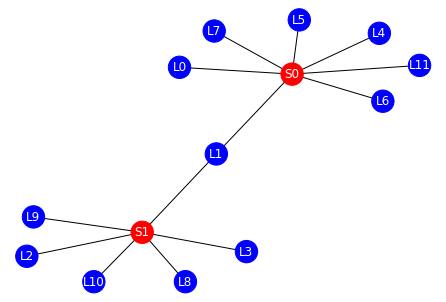

In [8]:
current_neuron.plot_soma_limb_concept_network()

In [10]:
# ----------------- Calculating the Spines and Width ----------- #
current_neuron.calculate_spines(print_flag=True)
#nviz.plot_spines(current_neuron)

current_neuron.calculate_new_width(no_spines=False,
                                       distance_by_mesh_center=True)

current_neuron.calculate_new_width(no_spines=False,
                                       distance_by_mesh_center=True,
                                       summary_measure="median")

current_neuron.calculate_new_width(no_spines=True,
                                       distance_by_mesh_center=True,
                                       summary_measure="mean")

current_neuron.calculate_new_width(no_spines=True,
                                       distance_by_mesh_center=True,
                                       summary_measure="median")


query = median_mesh_center > 200 and n_faces_branch>100
smoothness_threshold = 0.08
The median_mesh_center was requested but has not already been calculated so calculating now.... 
Working on limb L0 branch 45
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 28
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 47
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 21
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 27
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 53
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 56
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 14
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 20
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 57
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 59
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 68
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 69
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 17
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 18
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 51
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 60
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 13
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 15
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 52
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 58
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 37
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 61
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 12
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 16
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 25
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 49
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 63
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 64
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 10
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 11
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 19
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 24
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 48
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 54
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 55
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 65
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 8
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 9
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 46
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 50
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 44
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 62
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 5
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 7
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 41
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 43
Before width call: distance_by_mesh_center = True, no_spines = False



Assigning the old width calculation because no valid new widths
Working on limb L0 branch 66
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 67
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 3
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 6
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 38
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 40
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 2
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 4
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 39
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 42
Before width call: distance_by_mesh_center = True, no_spines = False



Assigning the old width calculation because no valid new widths
Working on limb L0 branch 0
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 1
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 22
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 35
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 34
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 70
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 23
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 32
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 30
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 33
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 29
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 31
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 26
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 36
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L1 branch 11
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L1 branch 16
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L1 branch 17
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L1 branch 20
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L1 branch 22
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L1 branch 21
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L1 branch 27
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L1 branch 18
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L1 branch 28
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L1 branch 12
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L1 branch 15
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L1 branch 29
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L1 branch 30
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L1 branch 31
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L1 branch 33
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L1 branch 26
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L1 branch 32
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L1 branch 34
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L1 branch 35
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L1 branch 23
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L1 branch 24
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L1 branch 25
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L1 branch 10
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L1 branch 36
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L1 branch 39
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L1 branch 40
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L1 branch 14
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L1 branch 19
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L1 branch 37
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L1 branch 38
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L1 branch 9
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L1 branch 13
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L1 branch 7
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L1 branch 8
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L1 branch 4
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L1 branch 41
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L1 branch 2
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L1 branch 3
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L1 branch 5
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L1 branch 6
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L1 branch 0
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L1 branch 1
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L4 branch 0
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L4 branch 1
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L4 branch 2
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L4 branch 10
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L4 branch 11
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L4 branch 5
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L4 branch 6
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L4 branch 13
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L4 branch 14
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L4 branch 3
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L4 branch 7
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L4 branch 9
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L4 branch 12
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L4 branch 15
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L4 branch 4
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L4 branch 8
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L4 branch 16
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L4 branch 17
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L4 branch 19
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L4 branch 20
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L4 branch 24
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L4 branch 18
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L4 branch 44
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L4 branch 46
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L4 branch 21
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L4 branch 23
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L4 branch 30
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L4 branch 47
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L4 branch 48
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L4 branch 22
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L4 branch 25
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L4 branch 29
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L4 branch 31
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L4 branch 26
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L4 branch 27
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L4 branch 41
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L4 branch 45
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L4 branch 28
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L4 branch 32
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L4 branch 42
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L4 branch 43
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L4 branch 37
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L4 branch 40
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L4 branch 33
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L4 branch 38
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L4 branch 36
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L4 branch 35
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L4 branch 34.0
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L4 branch 39.0
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L5 branch 0
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L6 branch 37
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L6 branch 6
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L6 branch 19
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L6 branch 0
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L6 branch 3
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L6 branch 9
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L6 branch 20
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L6 branch 1
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L6 branch 2
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L6 branch 7
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L6 branch 21
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L6 branch 4
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L6 branch 5
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L6 branch 16
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L6 branch 22
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L6 branch 13
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L6 branch 34
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L6 branch 23
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L6 branch 24
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L6 branch 11
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L6 branch 12
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L6 branch 35
Before width call: distance_by_mesh_center = True, no_spines = False



Assigning the old width calculation because no valid new widths
Working on limb L6 branch 36
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L6 branch 26
Before width call: distance_by_mesh_center = True, no_spines = False



Assigning the old width calculation because no valid new widths
Working on limb L6 branch 27
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L6 branch 28
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L6 branch 8
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L6 branch 14
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L6 branch 10
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L6 branch 15
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L6 branch 25
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L6 branch 29
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L6 branch 17
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L6 branch 18
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L6 branch 32
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L6 branch 33
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L6 branch 30
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L6 branch 31
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L7 branch 7
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L7 branch 6
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L7 branch 8
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L7 branch 3
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L7 branch 5
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L7 branch 9
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L7 branch 10
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L7 branch 0
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L7 branch 2
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L7 branch 1
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L7 branch 4
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L11 branch 0
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L2 branch 33
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L2 branch 1
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L2 branch 6
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L2 branch 0
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L2 branch 2
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L2 branch 7
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L2 branch 8
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L2 branch 3
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L2 branch 9
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L2 branch 12
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L2 branch 10
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L2 branch 11
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L2 branch 14
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L2 branch 16
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L2 branch 17
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L2 branch 19
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L2 branch 15
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L2 branch 21
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L2 branch 27
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L2 branch 30
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L2 branch 31
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L2 branch 13
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L2 branch 20
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L2 branch 22
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L2 branch 26
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L2 branch 28
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L2 branch 4
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L2 branch 32
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L2 branch 23
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L2 branch 25
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L2 branch 24
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L2 branch 29
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L2 branch 5
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L2 branch 18
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L3 branch 4
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L3 branch 0
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L3 branch 3
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L3 branch 1
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L3 branch 2
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L8 branch 13
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L8 branch 14
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L8 branch 16
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L8 branch 7
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L8 branch 11
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L8 branch 9
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L8 branch 10
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L8 branch 2
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L8 branch 12
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L8 branch 8
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L8 branch 15
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L8 branch 3
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L8 branch 5
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L8 branch 0
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L8 branch 4
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L8 branch 1
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L8 branch 6
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L9 branch 1
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L9 branch 2
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L9 branch 3
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L9 branch 0
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L9 branch 4
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L9 branch 7
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L9 branch 8
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L9 branch 5
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L9 branch 6
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L9 branch 11
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L9 branch 12
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L9 branch 9
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L9 branch 10
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L9 branch 13
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L9 branch 14
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L9 branch 15
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L9 branch 16
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L9 branch 18
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L9 branch 19
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L9 branch 24
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L9 branch 20
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L9 branch 25
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L9 branch 22
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L9 branch 23
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L9 branch 17.0
Before width call: distance_by_mesh_center = True, no_spines = False



Assigning the old width calculation because no valid new widths
Working on limb L9 branch 21.0
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L10 branch 9
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L10 branch 5
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L10 branch 8
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L10 branch 4
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L10 branch 10
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L10 branch 1
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L10 branch 3
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L10 branch 6
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L10 branch 7
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L10 branch 0
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L10 branch 2
Before width call: distance_by_mesh_center = True, no_spines = False



new_branch_dict = {'L0': array([ 0,  2,  3,  5,  8, 10, 12, 15, 17, 18, 19, 20, 21, 22, 23, 25, 28,
       30, 32, 34, 35, 37, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 56, 57, 59, 60, 61, 62, 63, 65, 67, 69]), 'L1': array([ 0,  2,  4,  7,  9, 10, 11, 12, 14, 16, 17, 18, 22, 23, 26, 27, 28,
       29, 30, 31, 32, 33, 34, 35, 36, 39, 40]), 'L10': array([ 3,  4,  5,  8,  9, 10]), 'L11': array([0]), 'L2': array([ 0,  1,  4,  6,  8,  9, 10, 11, 12, 14, 17, 19, 20, 21, 33]), 'L3': array([4]), 'L4': array([ 0,  1,  2,  5,  6,  7,  8, 10, 11, 14, 17, 18, 23, 24, 29, 30, 31,
       39, 41, 42, 43, 44, 46, 47]), 'L5': array([0]), 'L6': array([ 0,  1,  3,  6,  7,  9, 12, 19, 20, 21, 22, 23, 27, 28, 29, 33, 37]), 'L7': array([ 0,  1,  3,  5,  6,  7,  8,  9, 10]), 'L8': array([ 1,  2,  3,  4,  5,  8,  9, 10, 11, 12, 13, 15, 16]), 'L9': array([ 0,  1,  2,  3,  4,  6,  7,  8, 10, 12, 13, 14, 18, 23, 25])}
Working on limb L0 branch 0



--> n_spines found before filtering = 19
--> n_spines found = 17
Working on limb L0 branch 2



--> n_spines found before filtering = 6
--> n_spines found = 6
Working on limb L0 branch 3



--> n_spines found before filtering = 12
--> n_spines found = 5
Working on limb L0 branch 5



--> n_spines found before filtering = 2
--> n_spines found = 2
Working on limb L0 branch 8



--> n_spines found before filtering = 3
--> n_spines found = 3
Working on limb L0 branch 10



--> n_spines found before filtering = 58
--> n_spines found = 49
Working on limb L0 branch 12



--> n_spines found before filtering = 55
--> n_spines found = 49
Working on limb L0 branch 15



--> n_spines found before filtering = 0
--> n_spines found = 0
Working on limb L0 branch 17



--> n_spines found before filtering = 67
--> n_spines found = 57
Working on limb L0 branch 18



--> n_spines found before filtering = 64
--> n_spines found = 55
Working on limb L0 branch 19



--> n_spines found before filtering = 68
--> n_spines found = 61
Working on limb L0 branch 20



--> n_spines found before filtering = 9
--> n_spines found = 8
Working on limb L0 branch 21



--> n_spines found before filtering = 37
--> n_spines found = 29
Working on limb L0 branch 22



--> n_spines found before filtering = 36
--> n_spines found = 29
Working on limb L0 branch 23



--> n_spines found before filtering = 42
--> n_spines found = 38
Working on limb L0 branch 25



--> n_spines found before filtering = 13
--> n_spines found = 11
Working on limb L0 branch 28



--> n_spines found before filtering = 4
--> n_spines found = 2
Working on limb L0 branch 30



--> n_spines found before filtering = 18
--> n_spines found = 16
Working on limb L0 branch 32



--> n_spines found before filtering = 0
--> n_spines found = 0
Working on limb L0 branch 34



--> n_spines found before filtering = 7
--> n_spines found = 7
Working on limb L0 branch 35



--> n_spines found before filtering = 42
--> n_spines found = 37
Working on limb L0 branch 37



--> n_spines found before filtering = 59
--> n_spines found = 46
Working on limb L0 branch 39



--> n_spines found before filtering = 1
--> n_spines found = 1
Working on limb L0 branch 40



--> n_spines found before filtering = 13
--> n_spines found = 11
Working on limb L0 branch 41



--> n_spines found before filtering = 17
--> n_spines found = 13
Working on limb L0 branch 42



--> n_spines found before filtering = 0
--> n_spines found = 0
Working on limb L0 branch 43



--> n_spines found before filtering = 0
--> n_spines found = 0
Working on limb L0 branch 44



--> n_spines found before filtering = 74
--> n_spines found = 61
Working on limb L0 branch 45



--> n_spines found before filtering = 7
--> n_spines found = 3
Working on limb L0 branch 46



--> n_spines found before filtering = 18
--> n_spines found = 15
Working on limb L0 branch 47



--> n_spines found before filtering = 5
--> n_spines found = 2
Working on limb L0 branch 48



--> n_spines found before filtering = 19
--> n_spines found = 15
Working on limb L0 branch 49



--> n_spines found before filtering = 18
--> n_spines found = 11
Working on limb L0 branch 50



--> n_spines found before filtering = 35
--> n_spines found = 29
Working on limb L0 branch 51



--> n_spines found before filtering = 5
--> n_spines found = 0
Working on limb L0 branch 52



--> n_spines found before filtering = 7
--> n_spines found = 5
Working on limb L0 branch 53



--> n_spines found before filtering = 6
--> n_spines found = 2
Working on limb L0 branch 54



--> n_spines found before filtering = 7
--> n_spines found = 4
Working on limb L0 branch 56



--> n_spines found before filtering = 50
--> n_spines found = 38
Working on limb L0 branch 57



--> n_spines found before filtering = 4
--> n_spines found = 3
Working on limb L0 branch 59



--> n_spines found before filtering = 29
--> n_spines found = 20
Working on limb L0 branch 60



--> n_spines found before filtering = 31
--> n_spines found = 24
Working on limb L0 branch 61



--> n_spines found before filtering = 9
--> n_spines found = 7
Working on limb L0 branch 62



--> n_spines found before filtering = 48
--> n_spines found = 37
Working on limb L0 branch 63



--> n_spines found before filtering = 10
--> n_spines found = 8
Working on limb L0 branch 65



--> n_spines found before filtering = 64
--> n_spines found = 50
Working on limb L0 branch 67



--> n_spines found before filtering = 14
--> n_spines found = 13
Working on limb L0 branch 69



--> n_spines found before filtering = 3
--> n_spines found = 3
Working on limb L1 branch 0



--> n_spines found before filtering = 23
--> n_spines found = 14
Working on limb L1 branch 2



--> n_spines found before filtering = 20
--> n_spines found = 10
Working on limb L1 branch 4



--> n_spines found before filtering = 75
--> n_spines found = 57
Working on limb L1 branch 7



--> n_spines found before filtering = 10
--> n_spines found = 8
Working on limb L1 branch 9



--> n_spines found before filtering = 24
--> n_spines found = 15
Working on limb L1 branch 10



--> n_spines found before filtering = 93
--> n_spines found = 77
Working on limb L1 branch 11



--> n_spines found before filtering = 2
--> n_spines found = 1
Working on limb L1 branch 12



--> n_spines found before filtering = 25
--> n_spines found = 20
Working on limb L1 branch 14



--> n_spines found before filtering = 38
--> n_spines found = 29
Working on limb L1 branch 16



--> n_spines found before filtering = 39
--> n_spines found = 31
Working on limb L1 branch 17



--> n_spines found before filtering = 46
--> n_spines found = 38
Working on limb L1 branch 18



--> n_spines found before filtering = 25
--> n_spines found = 19
Working on limb L1 branch 22



--> n_spines found before filtering = 12
--> n_spines found = 9
Working on limb L1 branch 23



--> n_spines found before filtering = 5
--> n_spines found = 3
Working on limb L1 branch 26



--> n_spines found before filtering = 24
--> n_spines found = 15
Working on limb L1 branch 27



--> n_spines found before filtering = 10
--> n_spines found = 8
Working on limb L1 branch 28



--> n_spines found before filtering = 4
--> n_spines found = 3
Working on limb L1 branch 29



--> n_spines found before filtering = 61
--> n_spines found = 50
Working on limb L1 branch 30



--> n_spines found before filtering = 6
--> n_spines found = 5
Working on limb L1 branch 31



--> n_spines found before filtering = 5
--> n_spines found = 4
Working on limb L1 branch 32



--> n_spines found before filtering = 38
--> n_spines found = 26
Working on limb L1 branch 33



--> n_spines found before filtering = 14
--> n_spines found = 9
Working on limb L1 branch 34



--> n_spines found before filtering = 1
--> n_spines found = 1
Working on limb L1 branch 35



--> n_spines found before filtering = 32
--> n_spines found = 28
Working on limb L1 branch 36



--> n_spines found before filtering = 4
--> n_spines found = 0
Working on limb L1 branch 39



--> n_spines found before filtering = 0
--> n_spines found = 0
Working on limb L1 branch 40



--> n_spines found before filtering = 19
--> n_spines found = 13
Working on limb L2 branch 0



--> n_spines found before filtering = 23
--> n_spines found = 18
Working on limb L2 branch 1



--> n_spines found before filtering = 12
--> n_spines found = 8
Working on limb L2 branch 4



--> n_spines found before filtering = 13
--> n_spines found = 10
Working on limb L2 branch 6



--> n_spines found before filtering = 5
--> n_spines found = 3
Working on limb L2 branch 8



There was only one mesh found from the spine process and mesh split, returning empty array
--> n_spines found before filtering = 0
--> n_spines found = 0
Working on limb L2 branch 9



--> n_spines found before filtering = 2
--> n_spines found = 1
Working on limb L2 branch 10



--> n_spines found before filtering = 27
--> n_spines found = 18
Working on limb L2 branch 11



--> n_spines found before filtering = 24
--> n_spines found = 16
Working on limb L2 branch 12



--> n_spines found before filtering = 12
--> n_spines found = 8
Working on limb L2 branch 14



--> n_spines found before filtering = 61
--> n_spines found = 50
Working on limb L2 branch 17



--> n_spines found before filtering = 53
--> n_spines found = 45
Working on limb L2 branch 19



--> n_spines found before filtering = 52
--> n_spines found = 45
Working on limb L2 branch 20



--> n_spines found before filtering = 9
--> n_spines found = 8
Working on limb L2 branch 21



--> n_spines found before filtering = 8
--> n_spines found = 6
Working on limb L2 branch 33



--> n_spines found before filtering = 3
--> n_spines found = 3
Working on limb L3 branch 4



--> n_spines found before filtering = 3
--> n_spines found = 1
Working on limb L4 branch 0



--> n_spines found before filtering = 16
--> n_spines found = 12
Working on limb L4 branch 1



--> n_spines found before filtering = 34
--> n_spines found = 28
Working on limb L4 branch 2



--> n_spines found before filtering = 18
--> n_spines found = 15
Working on limb L4 branch 5



--> n_spines found before filtering = 5
--> n_spines found = 4
Working on limb L4 branch 6



--> n_spines found before filtering = 27
--> n_spines found = 22
Working on limb L4 branch 7



--> n_spines found before filtering = 0
--> n_spines found = 0
Working on limb L4 branch 8



--> n_spines found before filtering = 49
--> n_spines found = 42
Working on limb L4 branch 10



--> n_spines found before filtering = 58
--> n_spines found = 43
Working on limb L4 branch 11



--> n_spines found before filtering = 26
--> n_spines found = 19
Working on limb L4 branch 14



--> n_spines found before filtering = 12
--> n_spines found = 9
Working on limb L4 branch 17



--> n_spines found before filtering = 56
--> n_spines found = 50
Working on limb L4 branch 18



--> n_spines found before filtering = 7
--> n_spines found = 3
Working on limb L4 branch 23



--> n_spines found before filtering = 0
--> n_spines found = 0
Working on limb L4 branch 24



--> n_spines found before filtering = 6
--> n_spines found = 3
Working on limb L4 branch 29



--> n_spines found before filtering = 1
--> n_spines found = 1
Working on limb L4 branch 30



--> n_spines found before filtering = 0
--> n_spines found = 0
Working on limb L4 branch 31



--> n_spines found before filtering = 9
--> n_spines found = 6
Working on limb L4 branch 39



--> n_spines found before filtering = 3
--> n_spines found = 3
Working on limb L4 branch 41



--> n_spines found before filtering = 16
--> n_spines found = 13
Working on limb L4 branch 42



--> n_spines found before filtering = 2
--> n_spines found = 2
Working on limb L4 branch 43



--> n_spines found before filtering = 18
--> n_spines found = 12
Working on limb L4 branch 44



--> n_spines found before filtering = 0
--> n_spines found = 0
Working on limb L4 branch 46



--> n_spines found before filtering = 0
--> n_spines found = 0
Working on limb L4 branch 47



--> n_spines found before filtering = 0
--> n_spines found = 0
Working on limb L5 branch 0



--> n_spines found before filtering = 4
--> n_spines found = 2
Working on limb L6 branch 0



--> n_spines found before filtering = 75
--> n_spines found = 61
Working on limb L6 branch 1



--> n_spines found before filtering = 16
--> n_spines found = 14
Working on limb L6 branch 3



--> n_spines found before filtering = 20
--> n_spines found = 16
Working on limb L6 branch 6



--> n_spines found before filtering = 11
--> n_spines found = 9
Working on limb L6 branch 7



--> n_spines found before filtering = 73
--> n_spines found = 66
Working on limb L6 branch 9



--> n_spines found before filtering = 42
--> n_spines found = 34
Working on limb L6 branch 12



--> n_spines found before filtering = 2
--> n_spines found = 1
Working on limb L6 branch 19



--> n_spines found before filtering = 24
--> n_spines found = 16
Working on limb L6 branch 20



--> n_spines found before filtering = 7
--> n_spines found = 6
Working on limb L6 branch 21



--> n_spines found before filtering = 7
--> n_spines found = 3
Working on limb L6 branch 22



--> n_spines found before filtering = 0
--> n_spines found = 0
Working on limb L6 branch 23



--> n_spines found before filtering = 13
--> n_spines found = 11
Working on limb L6 branch 27



--> n_spines found before filtering = 3
--> n_spines found = 2
Working on limb L6 branch 28



--> n_spines found before filtering = 0
--> n_spines found = 0
Working on limb L6 branch 29



--> n_spines found before filtering = 41
--> n_spines found = 37
Working on limb L6 branch 33



--> n_spines found before filtering = 45
--> n_spines found = 38
Working on limb L6 branch 37



There was only one mesh found from the spine process and mesh split, returning empty array
--> n_spines found before filtering = 0
--> n_spines found = 0
Working on limb L7 branch 0



--> n_spines found before filtering = 73
--> n_spines found = 62
Working on limb L7 branch 1



--> n_spines found before filtering = 67
--> n_spines found = 57
Working on limb L7 branch 3



--> n_spines found before filtering = 80
--> n_spines found = 67
Working on limb L7 branch 5



--> n_spines found before filtering = 100
--> n_spines found = 87
Working on limb L7 branch 6



--> n_spines found before filtering = 14
--> n_spines found = 10
Working on limb L7 branch 7



--> n_spines found before filtering = 8
--> n_spines found = 3
Working on limb L7 branch 8



--> n_spines found before filtering = 12
--> n_spines found = 8
Working on limb L7 branch 9



--> n_spines found before filtering = 49
--> n_spines found = 37
Working on limb L7 branch 10



--> n_spines found before filtering = 10
--> n_spines found = 8
Working on limb L8 branch 1



--> n_spines found before filtering = 51
--> n_spines found = 40
Working on limb L8 branch 2



--> n_spines found before filtering = 24
--> n_spines found = 22
Working on limb L8 branch 3



--> n_spines found before filtering = 7
--> n_spines found = 7
Working on limb L8 branch 4



--> n_spines found before filtering = 3
--> n_spines found = 3
Working on limb L8 branch 5



--> n_spines found before filtering = 22
--> n_spines found = 21
Working on limb L8 branch 8



--> n_spines found before filtering = 30
--> n_spines found = 24
Working on limb L8 branch 9



--> n_spines found before filtering = 11
--> n_spines found = 10
Working on limb L8 branch 10



--> n_spines found before filtering = 2
--> n_spines found = 2
Working on limb L8 branch 11



There was only one mesh found from the spine process and mesh split, returning empty array
--> n_spines found before filtering = 0
--> n_spines found = 0
Working on limb L8 branch 12



--> n_spines found before filtering = 4
--> n_spines found = 2
Working on limb L8 branch 13



--> n_spines found before filtering = 2
--> n_spines found = 0
Working on limb L8 branch 15



--> n_spines found before filtering = 53
--> n_spines found = 45
Working on limb L8 branch 16



--> n_spines found before filtering = 0
--> n_spines found = 0
Working on limb L9 branch 0



--> n_spines found before filtering = 38
--> n_spines found = 29
Working on limb L9 branch 1



--> n_spines found before filtering = 5
--> n_spines found = 1
Working on limb L9 branch 2



--> n_spines found before filtering = 9
--> n_spines found = 6
Working on limb L9 branch 3



--> n_spines found before filtering = 3
--> n_spines found = 2
Working on limb L9 branch 4



--> n_spines found before filtering = 20
--> n_spines found = 16
Working on limb L9 branch 6



--> n_spines found before filtering = 5
--> n_spines found = 4
Working on limb L9 branch 7



--> n_spines found before filtering = 44
--> n_spines found = 32
Working on limb L9 branch 8



--> n_spines found before filtering = 17
--> n_spines found = 14
Working on limb L9 branch 10



--> n_spines found before filtering = 21
--> n_spines found = 17
Working on limb L9 branch 12



--> n_spines found before filtering = 15
--> n_spines found = 13
Working on limb L9 branch 13



--> n_spines found before filtering = 3
--> n_spines found = 1
Working on limb L9 branch 14



--> n_spines found before filtering = 8
--> n_spines found = 4
Working on limb L9 branch 18



--> n_spines found before filtering = 14
--> n_spines found = 10
Working on limb L9 branch 23



--> n_spines found before filtering = 11
--> n_spines found = 7
Working on limb L9 branch 25



--> n_spines found before filtering = 0
--> n_spines found = 0
Working on limb L10 branch 3



--> n_spines found before filtering = 7
--> n_spines found = 5
Working on limb L10 branch 4



--> n_spines found before filtering = 48
--> n_spines found = 38
Working on limb L10 branch 5



--> n_spines found before filtering = 24
--> n_spines found = 15
Working on limb L10 branch 8



--> n_spines found before filtering = 2
--> n_spines found = 2
Working on limb L10 branch 9



--> n_spines found before filtering = 5
--> n_spines found = 4
Working on limb L10 branch 10



There was only one mesh found from the spine process and mesh split, returning empty array
--> n_spines found before filtering = 0
--> n_spines found = 0
Working on limb L11 branch 0



--> n_spines found before filtering = 1
--> n_spines found = 1
Working on limb L0 branch 45
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 28
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 47
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 21
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 27
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 53
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 56
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 14
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 20
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 57
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 59
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 68
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 69
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 17
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 18
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 51
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 60
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 13
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 15
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 52
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 58
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 37
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 61
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 12
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 16
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 25
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 49
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 63
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 64
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 10
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 11
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 19
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 24
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 48
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 54
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 55
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 65
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 8
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 9
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 46
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 50
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 44
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 62
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 5
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 7
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 41
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 43
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 66
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 67
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 3
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 6
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 38
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 40
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 2
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 4
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 39
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 42
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 0
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 1
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 22
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 35
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 34
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 70
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 23
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 32
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 30
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 33
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 29
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 31
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 26
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 36
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L1 branch 11
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L1 branch 16
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L1 branch 17
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L1 branch 20
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L1 branch 22
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L1 branch 21
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L1 branch 27
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L1 branch 18
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L1 branch 28
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L1 branch 12
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L1 branch 15
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L1 branch 29
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L1 branch 30
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L1 branch 31
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L1 branch 33
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L1 branch 26
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L1 branch 32
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L1 branch 34
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L1 branch 35
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L1 branch 23
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L1 branch 24
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L1 branch 25
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L1 branch 10
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L1 branch 36
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L1 branch 39
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L1 branch 40
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L1 branch 14
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L1 branch 19
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L1 branch 37
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L1 branch 38
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L1 branch 9
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L1 branch 13
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L1 branch 7
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L1 branch 8
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L1 branch 4
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L1 branch 41
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L1 branch 2
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L1 branch 3
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L1 branch 5
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L1 branch 6
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L1 branch 0
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L1 branch 1
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L4 branch 0
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L4 branch 1
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L4 branch 2
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L4 branch 10
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L4 branch 11
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L4 branch 5
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L4 branch 6
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L4 branch 13
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L4 branch 14
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L4 branch 3
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L4 branch 7
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L4 branch 9
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L4 branch 12
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L4 branch 15
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L4 branch 4
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L4 branch 8
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L4 branch 16
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L4 branch 17
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L4 branch 19
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L4 branch 20
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L4 branch 24
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L4 branch 18
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L4 branch 44
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L4 branch 46
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L4 branch 21
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L4 branch 23
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L4 branch 30
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L4 branch 47
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L4 branch 48
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L4 branch 22
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L4 branch 25
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L4 branch 29
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L4 branch 31
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L4 branch 26
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L4 branch 27
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L4 branch 41
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L4 branch 45
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L4 branch 28
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L4 branch 32
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L4 branch 42
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L4 branch 43
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L4 branch 37
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L4 branch 40
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L4 branch 33
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L4 branch 38
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L4 branch 36
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L4 branch 35
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L4 branch 34.0
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L4 branch 39.0
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L5 branch 0
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L6 branch 37
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L6 branch 6
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L6 branch 19
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L6 branch 0
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L6 branch 3
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L6 branch 9
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L6 branch 20
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L6 branch 1
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L6 branch 2
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L6 branch 7
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L6 branch 21
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L6 branch 4
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L6 branch 5
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L6 branch 16
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L6 branch 22
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L6 branch 13
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L6 branch 34
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L6 branch 23
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L6 branch 24
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L6 branch 11
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L6 branch 12
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L6 branch 35
Before width call: distance_by_mesh_center = True, no_spines = False



Assigning the old width calculation because no valid new widths
Working on limb L6 branch 36
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L6 branch 26
Before width call: distance_by_mesh_center = True, no_spines = False



Assigning the old width calculation because no valid new widths
Working on limb L6 branch 27
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L6 branch 28
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L6 branch 8
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L6 branch 14
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L6 branch 10
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L6 branch 15
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L6 branch 25
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L6 branch 29
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L6 branch 17
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L6 branch 18
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L6 branch 32
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L6 branch 33
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L6 branch 30
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L6 branch 31
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L7 branch 7
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L7 branch 6
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L7 branch 8
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L7 branch 3
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L7 branch 5
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L7 branch 9
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L7 branch 10
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L7 branch 0
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L7 branch 2
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L7 branch 1
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L7 branch 4
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L11 branch 0
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L2 branch 33
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L2 branch 1
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L2 branch 6
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L2 branch 0
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L2 branch 2
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L2 branch 7
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L2 branch 8
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L2 branch 3
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L2 branch 9
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L2 branch 12
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L2 branch 10
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L2 branch 11
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L2 branch 14
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L2 branch 16
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L2 branch 17
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L2 branch 19
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L2 branch 15
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L2 branch 21
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L2 branch 27
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L2 branch 30
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L2 branch 31
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L2 branch 13
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L2 branch 20
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L2 branch 22
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L2 branch 26
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L2 branch 28
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L2 branch 4
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L2 branch 32
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L2 branch 23
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L2 branch 25
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L2 branch 24
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L2 branch 29
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L2 branch 5
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L2 branch 18
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L3 branch 4
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L3 branch 0
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L3 branch 3
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L3 branch 1
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L3 branch 2
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L8 branch 13
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L8 branch 14
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L8 branch 16
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L8 branch 7
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L8 branch 11
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L8 branch 9
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L8 branch 10
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L8 branch 2
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L8 branch 12
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L8 branch 8
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L8 branch 15
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L8 branch 3
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L8 branch 5
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L8 branch 0
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L8 branch 4
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L8 branch 1
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L8 branch 6
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L9 branch 1
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L9 branch 2
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L9 branch 3
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L9 branch 0
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L9 branch 4
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L9 branch 7
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L9 branch 8
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L9 branch 5
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L9 branch 6
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L9 branch 11
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L9 branch 12
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L9 branch 9
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L9 branch 10
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L9 branch 13
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L9 branch 14
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L9 branch 15
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L9 branch 16
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L9 branch 18
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L9 branch 19
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L9 branch 24
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L9 branch 20
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L9 branch 25
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L9 branch 22
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L9 branch 23
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L9 branch 17.0
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L9 branch 21.0
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L10 branch 9
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L10 branch 5
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L10 branch 8
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L10 branch 4
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L10 branch 10
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L10 branch 1
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L10 branch 3
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L10 branch 6
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L10 branch 7
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L10 branch 0
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L10 branch 2
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 45
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 28
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 47
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 21
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 27
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 53
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 56
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 14
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 20
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 57
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 59
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 68
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 69
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 17
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 18
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 51
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 60
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 13
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 15
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 52
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 58
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 37
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 61
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 12
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 16
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 25
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 49
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 63
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 64
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 10
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 11
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 19
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 24
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 48
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 54
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 55
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 65
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 8
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 9
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 46
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 50
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 44
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 62
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 5
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 7
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 41
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 43
Before width call: distance_by_mesh_center = True, no_spines = False



Assigning the old width calculation because no valid new widths
Working on limb L0 branch 66
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 67
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 3
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 6
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 38
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 40
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 2
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 4
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 39
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 42
Before width call: distance_by_mesh_center = True, no_spines = False



Assigning the old width calculation because no valid new widths
Working on limb L0 branch 0
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 1
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 22
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 35
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 34
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 70
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 23
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 32
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 30
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 33
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 29
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 31
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 26
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 36
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L1 branch 11
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L1 branch 16
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L1 branch 17
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L1 branch 20
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L1 branch 22
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L1 branch 21
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L1 branch 27
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L1 branch 18
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L1 branch 28
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L1 branch 12
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L1 branch 15
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L1 branch 29
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L1 branch 30
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L1 branch 31
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L1 branch 33
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L1 branch 26
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L1 branch 32
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L1 branch 34
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L1 branch 35
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L1 branch 23
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L1 branch 24
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L1 branch 25
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L1 branch 10
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L1 branch 36
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L1 branch 39
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L1 branch 40
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L1 branch 14
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L1 branch 19
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L1 branch 37
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L1 branch 38
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L1 branch 9
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L1 branch 13
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L1 branch 7
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L1 branch 8
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L1 branch 4
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L1 branch 41
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L1 branch 2
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L1 branch 3
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L1 branch 5
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L1 branch 6
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L1 branch 0
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L1 branch 1
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L4 branch 0
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L4 branch 1
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L4 branch 2
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L4 branch 10
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L4 branch 11
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L4 branch 5
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L4 branch 6
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L4 branch 13
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L4 branch 14
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L4 branch 3
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L4 branch 7
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L4 branch 9
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L4 branch 12
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L4 branch 15
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L4 branch 4
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L4 branch 8
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L4 branch 16
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L4 branch 17
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L4 branch 19
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L4 branch 20
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L4 branch 24
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L4 branch 18
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L4 branch 44
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L4 branch 46
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L4 branch 21
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L4 branch 23
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L4 branch 30
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L4 branch 47
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L4 branch 48
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L4 branch 22
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L4 branch 25
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L4 branch 29
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L4 branch 31
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L4 branch 26
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L4 branch 27
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L4 branch 41
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L4 branch 45
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L4 branch 28
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L4 branch 32
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L4 branch 42
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L4 branch 43
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L4 branch 37
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L4 branch 40
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L4 branch 33
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L4 branch 38
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L4 branch 36
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L4 branch 35
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L4 branch 34.0
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L4 branch 39.0
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L5 branch 0
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L6 branch 37
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L6 branch 6
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L6 branch 19
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L6 branch 0
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L6 branch 3
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L6 branch 9
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L6 branch 20
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L6 branch 1
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L6 branch 2
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L6 branch 7
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L6 branch 21
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L6 branch 4
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L6 branch 5
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L6 branch 16
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L6 branch 22
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L6 branch 13
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L6 branch 34
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L6 branch 23
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L6 branch 24
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L6 branch 11
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L6 branch 12
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L6 branch 35
Before width call: distance_by_mesh_center = True, no_spines = False



Assigning the old width calculation because no valid new widths
Working on limb L6 branch 36
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L6 branch 26
Before width call: distance_by_mesh_center = True, no_spines = False



Assigning the old width calculation because no valid new widths
Working on limb L6 branch 27
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L6 branch 28
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L6 branch 8
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L6 branch 14
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L6 branch 10
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L6 branch 15
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L6 branch 25
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L6 branch 29
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L6 branch 17
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L6 branch 18
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L6 branch 32
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L6 branch 33
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L6 branch 30
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L6 branch 31
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L7 branch 7
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L7 branch 6
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L7 branch 8
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L7 branch 3
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L7 branch 5
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L7 branch 9
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L7 branch 10
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L7 branch 0
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L7 branch 2
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L7 branch 1
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L7 branch 4
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L11 branch 0
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L2 branch 33
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L2 branch 1
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L2 branch 6
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L2 branch 0
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L2 branch 2
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L2 branch 7
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L2 branch 8
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L2 branch 3
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L2 branch 9
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L2 branch 12
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L2 branch 10
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L2 branch 11
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L2 branch 14
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L2 branch 16
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L2 branch 17
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L2 branch 19
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L2 branch 15
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L2 branch 21
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L2 branch 27
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L2 branch 30
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L2 branch 31
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L2 branch 13
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L2 branch 20
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L2 branch 22
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L2 branch 26
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L2 branch 28
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L2 branch 4
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L2 branch 32
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L2 branch 23
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L2 branch 25
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L2 branch 24
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L2 branch 29
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L2 branch 5
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L2 branch 18
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L3 branch 4
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L3 branch 0
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L3 branch 3
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L3 branch 1
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L3 branch 2
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L8 branch 13
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L8 branch 14
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L8 branch 16
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L8 branch 7
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L8 branch 11
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L8 branch 9
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L8 branch 10
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L8 branch 2
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L8 branch 12
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L8 branch 8
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L8 branch 15
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L8 branch 3
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L8 branch 5
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L8 branch 0
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L8 branch 4
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L8 branch 1
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L8 branch 6
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L9 branch 1
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L9 branch 2
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L9 branch 3
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L9 branch 0
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L9 branch 4
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L9 branch 7
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L9 branch 8
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L9 branch 5
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L9 branch 6
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L9 branch 11
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L9 branch 12
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L9 branch 9
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L9 branch 10
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L9 branch 13
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L9 branch 14
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L9 branch 15
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L9 branch 16
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L9 branch 18
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L9 branch 19
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L9 branch 24
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L9 branch 20
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L9 branch 25
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L9 branch 22
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L9 branch 23
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L9 branch 17.0
Before width call: distance_by_mesh_center = True, no_spines = False



Assigning the old width calculation because no valid new widths
Working on limb L9 branch 21.0
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L10 branch 9
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L10 branch 5
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L10 branch 8
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L10 branch 4
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L10 branch 10
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L10 branch 1
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L10 branch 3
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L10 branch 6
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L10 branch 7
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L10 branch 0
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L10 branch 2
Before width call: distance_by_mesh_center = True, no_spines = False



Working on limb L0 branch 45
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L0 branch 28
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L0 branch 47
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L0 branch 21
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L0 branch 27
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L0 branch 53
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L0 branch 56
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L0 branch 14
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L0 branch 20
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L0 branch 57
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L0 branch 59
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L0 branch 68
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L0 branch 69
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L0 branch 17
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L0 branch 18
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L0 branch 51
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L0 branch 60
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L0 branch 13
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L0 branch 15
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L0 branch 52
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L0 branch 58
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L0 branch 37
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L0 branch 61
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L0 branch 12
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L0 branch 16
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L0 branch 25
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L0 branch 49
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L0 branch 63
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L0 branch 64
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L0 branch 10
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L0 branch 11
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L0 branch 19
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L0 branch 24
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L0 branch 48
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L0 branch 54
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L0 branch 55
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L0 branch 65
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L0 branch 8
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L0 branch 9
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L0 branch 46
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L0 branch 50
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L0 branch 44
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L0 branch 62
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L0 branch 5
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L0 branch 7
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L0 branch 41
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L0 branch 43
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L0 branch 66
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L0 branch 67
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L0 branch 3
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L0 branch 6
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L0 branch 38
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L0 branch 40
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L0 branch 2
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L0 branch 4
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L0 branch 39
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L0 branch 42
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L0 branch 0
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L0 branch 1
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L0 branch 22
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L0 branch 35
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L0 branch 34
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L0 branch 70
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L0 branch 23
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L0 branch 32
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L0 branch 30
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L0 branch 33
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L0 branch 29
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L0 branch 31
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L0 branch 26
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L0 branch 36
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L1 branch 11
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L1 branch 16
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L1 branch 17
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L1 branch 20
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L1 branch 22
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L1 branch 21
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L1 branch 27
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L1 branch 18
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L1 branch 28
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L1 branch 12
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L1 branch 15
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L1 branch 29
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L1 branch 30
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L1 branch 31
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L1 branch 33
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L1 branch 26
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L1 branch 32
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L1 branch 34
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L1 branch 35
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L1 branch 23
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L1 branch 24
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L1 branch 25
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L1 branch 10
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L1 branch 36
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L1 branch 39
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L1 branch 40
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L1 branch 14
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L1 branch 19
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L1 branch 37
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L1 branch 38
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L1 branch 9
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L1 branch 13
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L1 branch 7
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L1 branch 8
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L1 branch 4
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L1 branch 41
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L1 branch 2
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L1 branch 3
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L1 branch 5
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L1 branch 6
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L1 branch 0
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L1 branch 1
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L4 branch 0
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L4 branch 1
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L4 branch 2
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L4 branch 10
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L4 branch 11
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L4 branch 5
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L4 branch 6
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L4 branch 13
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L4 branch 14
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L4 branch 3
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L4 branch 7
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L4 branch 9
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L4 branch 12
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L4 branch 15
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L4 branch 4
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L4 branch 8
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L4 branch 16
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L4 branch 17
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L4 branch 19
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L4 branch 20
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L4 branch 24
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L4 branch 18
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L4 branch 44
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L4 branch 46
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L4 branch 21
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L4 branch 23
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L4 branch 30
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L4 branch 47
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L4 branch 48
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L4 branch 22
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L4 branch 25
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L4 branch 29
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L4 branch 31
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L4 branch 26
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L4 branch 27
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L4 branch 41
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L4 branch 45
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L4 branch 28
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L4 branch 32
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L4 branch 42
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L4 branch 43
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L4 branch 37
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L4 branch 40
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L4 branch 33
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L4 branch 38
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L4 branch 36
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L4 branch 35
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L4 branch 34.0
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L4 branch 39.0
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L5 branch 0
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L6 branch 37
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L6 branch 6
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L6 branch 19
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L6 branch 0
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L6 branch 3
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L6 branch 9
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L6 branch 20
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L6 branch 1
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L6 branch 2
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L6 branch 7
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L6 branch 21
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L6 branch 4
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L6 branch 5
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L6 branch 16
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L6 branch 22
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L6 branch 13
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L6 branch 34
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L6 branch 23
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L6 branch 24
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L6 branch 11
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L6 branch 12
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L6 branch 35
Before width call: distance_by_mesh_center = True, no_spines = True



Assigning the old width calculation because no valid new widths
Working on limb L6 branch 36
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L6 branch 26
Before width call: distance_by_mesh_center = True, no_spines = True



Assigning the old width calculation because no valid new widths
Working on limb L6 branch 27
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L6 branch 28
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L6 branch 8
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L6 branch 14
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L6 branch 10
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L6 branch 15
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L6 branch 25
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L6 branch 29
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L6 branch 17
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L6 branch 18
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L6 branch 32
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L6 branch 33
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L6 branch 30
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L6 branch 31
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L7 branch 7
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L7 branch 6
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L7 branch 8
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L7 branch 3
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L7 branch 5
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L7 branch 9
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L7 branch 10
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L7 branch 0
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L7 branch 2
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L7 branch 1
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L7 branch 4
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L11 branch 0
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L2 branch 33
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L2 branch 1
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L2 branch 6
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L2 branch 0
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L2 branch 2
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L2 branch 7
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L2 branch 8
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L2 branch 3
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L2 branch 9
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L2 branch 12
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L2 branch 10
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L2 branch 11
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L2 branch 14
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L2 branch 16
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L2 branch 17
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L2 branch 19
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L2 branch 15
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L2 branch 21
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L2 branch 27
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L2 branch 30
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L2 branch 31
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L2 branch 13
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L2 branch 20
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L2 branch 22
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L2 branch 26
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L2 branch 28
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L2 branch 4
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L2 branch 32
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L2 branch 23
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L2 branch 25
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L2 branch 24
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L2 branch 29
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L2 branch 5
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L2 branch 18
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L3 branch 4
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L3 branch 0
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L3 branch 3
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L3 branch 1
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L3 branch 2
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L8 branch 13
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L8 branch 14
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L8 branch 16
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L8 branch 7
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L8 branch 11
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L8 branch 9
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L8 branch 10
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L8 branch 2
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L8 branch 12
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L8 branch 8
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L8 branch 15
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L8 branch 3
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L8 branch 5
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L8 branch 0
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L8 branch 4
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L8 branch 1
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L8 branch 6
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L9 branch 1
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L9 branch 2
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L9 branch 3
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L9 branch 0
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L9 branch 4
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L9 branch 7
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L9 branch 8
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L9 branch 5
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L9 branch 6
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L9 branch 11
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L9 branch 12
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L9 branch 9
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L9 branch 10
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L9 branch 13
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L9 branch 14
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L9 branch 15
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L9 branch 16
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L9 branch 18
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L9 branch 19
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L9 branch 24
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L9 branch 20
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L9 branch 25
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L9 branch 22
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L9 branch 23
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L9 branch 17.0
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L9 branch 21.0
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L10 branch 9
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L10 branch 5
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L10 branch 8
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L10 branch 4
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L10 branch 10
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L10 branch 1
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L10 branch 3
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L10 branch 6
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L10 branch 7
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L10 branch 0
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L10 branch 2
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L0 branch 45
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L0 branch 28
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L0 branch 47
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L0 branch 21
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L0 branch 27
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L0 branch 53
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L0 branch 56
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L0 branch 14
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L0 branch 20
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L0 branch 57
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L0 branch 59
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L0 branch 68
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L0 branch 69
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L0 branch 17
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L0 branch 18
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L0 branch 51
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L0 branch 60
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L0 branch 13
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L0 branch 15
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L0 branch 52
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L0 branch 58
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L0 branch 37
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L0 branch 61
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L0 branch 12
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L0 branch 16
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L0 branch 25
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L0 branch 49
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L0 branch 63
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L0 branch 64
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L0 branch 10
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L0 branch 11
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L0 branch 19
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L0 branch 24
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L0 branch 48
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L0 branch 54
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L0 branch 55
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L0 branch 65
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L0 branch 8
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L0 branch 9
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L0 branch 46
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L0 branch 50
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L0 branch 44
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L0 branch 62
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L0 branch 5
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L0 branch 7
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L0 branch 41
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L0 branch 43
Before width call: distance_by_mesh_center = True, no_spines = True



Assigning the old width calculation because no valid new widths
Working on limb L0 branch 66
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L0 branch 67
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L0 branch 3
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L0 branch 6
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L0 branch 38
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L0 branch 40
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L0 branch 2
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L0 branch 4
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L0 branch 39
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L0 branch 42
Before width call: distance_by_mesh_center = True, no_spines = True



Assigning the old width calculation because no valid new widths
Working on limb L0 branch 0
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L0 branch 1
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L0 branch 22
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L0 branch 35
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L0 branch 34
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L0 branch 70
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L0 branch 23
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L0 branch 32
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L0 branch 30
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L0 branch 33
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L0 branch 29
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L0 branch 31
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L0 branch 26
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L0 branch 36
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L1 branch 11
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L1 branch 16
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L1 branch 17
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L1 branch 20
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L1 branch 22
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L1 branch 21
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L1 branch 27
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L1 branch 18
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L1 branch 28
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L1 branch 12
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L1 branch 15
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L1 branch 29
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L1 branch 30
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L1 branch 31
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L1 branch 33
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L1 branch 26
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L1 branch 32
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L1 branch 34
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L1 branch 35
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L1 branch 23
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L1 branch 24
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L1 branch 25
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L1 branch 10
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L1 branch 36
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L1 branch 39
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L1 branch 40
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L1 branch 14
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L1 branch 19
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L1 branch 37
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L1 branch 38
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L1 branch 9
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L1 branch 13
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L1 branch 7
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L1 branch 8
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L1 branch 4
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L1 branch 41
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L1 branch 2
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L1 branch 3
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L1 branch 5
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L1 branch 6
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L1 branch 0
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L1 branch 1
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L4 branch 0
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L4 branch 1
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L4 branch 2
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L4 branch 10
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L4 branch 11
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L4 branch 5
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L4 branch 6
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L4 branch 13
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L4 branch 14
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L4 branch 3
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L4 branch 7
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L4 branch 9
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L4 branch 12
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L4 branch 15
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L4 branch 4
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L4 branch 8
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L4 branch 16
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L4 branch 17
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L4 branch 19
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L4 branch 20
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L4 branch 24
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L4 branch 18
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L4 branch 44
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L4 branch 46
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L4 branch 21
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L4 branch 23
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L4 branch 30
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L4 branch 47
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L4 branch 48
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L4 branch 22
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L4 branch 25
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L4 branch 29
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L4 branch 31
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L4 branch 26
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L4 branch 27
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L4 branch 41
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L4 branch 45
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L4 branch 28
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L4 branch 32
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L4 branch 42
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L4 branch 43
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L4 branch 37
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L4 branch 40
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L4 branch 33
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L4 branch 38
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L4 branch 36
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L4 branch 35
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L4 branch 34.0
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L4 branch 39.0
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L5 branch 0
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L6 branch 37
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L6 branch 6
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L6 branch 19
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L6 branch 0
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L6 branch 3
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L6 branch 9
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L6 branch 20
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L6 branch 1
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L6 branch 2
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L6 branch 7
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L6 branch 21
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L6 branch 4
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L6 branch 5
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L6 branch 16
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L6 branch 22
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L6 branch 13
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L6 branch 34
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L6 branch 23
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L6 branch 24
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L6 branch 11
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L6 branch 12
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L6 branch 35
Before width call: distance_by_mesh_center = True, no_spines = True



Assigning the old width calculation because no valid new widths
Working on limb L6 branch 36
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L6 branch 26
Before width call: distance_by_mesh_center = True, no_spines = True



Assigning the old width calculation because no valid new widths
Working on limb L6 branch 27
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L6 branch 28
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L6 branch 8
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L6 branch 14
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L6 branch 10
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L6 branch 15
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L6 branch 25
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L6 branch 29
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L6 branch 17
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L6 branch 18
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L6 branch 32
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L6 branch 33
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L6 branch 30
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L6 branch 31
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L7 branch 7
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L7 branch 6
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L7 branch 8
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L7 branch 3
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L7 branch 5
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L7 branch 9
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L7 branch 10
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L7 branch 0
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L7 branch 2
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L7 branch 1
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L7 branch 4
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L11 branch 0
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L2 branch 33
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L2 branch 1
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L2 branch 6
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L2 branch 0
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L2 branch 2
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L2 branch 7
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L2 branch 8
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L2 branch 3
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L2 branch 9
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L2 branch 12
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L2 branch 10
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L2 branch 11
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L2 branch 14
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L2 branch 16
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L2 branch 17
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L2 branch 19
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L2 branch 15
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L2 branch 21
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L2 branch 27
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L2 branch 30
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L2 branch 31
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L2 branch 13
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L2 branch 20
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L2 branch 22
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L2 branch 26
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L2 branch 28
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L2 branch 4
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L2 branch 32
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L2 branch 23
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L2 branch 25
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L2 branch 24
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L2 branch 29
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L2 branch 5
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L2 branch 18
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L3 branch 4
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L3 branch 0
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L3 branch 3
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L3 branch 1
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L3 branch 2
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L8 branch 13
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L8 branch 14
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L8 branch 16
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L8 branch 7
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L8 branch 11
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L8 branch 9
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L8 branch 10
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L8 branch 2
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L8 branch 12
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L8 branch 8
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L8 branch 15
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L8 branch 3
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L8 branch 5
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L8 branch 0
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L8 branch 4
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L8 branch 1
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L8 branch 6
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L9 branch 1
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L9 branch 2
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L9 branch 3
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L9 branch 0
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L9 branch 4
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L9 branch 7
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L9 branch 8
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L9 branch 5
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L9 branch 6
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L9 branch 11
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L9 branch 12
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L9 branch 9
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L9 branch 10
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L9 branch 13
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L9 branch 14
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L9 branch 15
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L9 branch 16
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L9 branch 18
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L9 branch 19
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L9 branch 24
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L9 branch 20
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L9 branch 25
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L9 branch 22
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L9 branch 23
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L9 branch 17.0
Before width call: distance_by_mesh_center = True, no_spines = True



Assigning the old width calculation because no valid new widths
Working on limb L9 branch 21.0
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L10 branch 9
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L10 branch 5
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L10 branch 8
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L10 branch 4
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L10 branch 10
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L10 branch 1
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L10 branch 3
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L10 branch 6
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L10 branch 7
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L10 branch 0
Before width call: distance_by_mesh_center = True, no_spines = True



Working on limb L10 branch 2
Before width call: distance_by_mesh_center = True, no_spines = True


In [11]:
current_neuron.save_compressed_neuron(output_folder=Path("/notebooks/test_neurons/meshafterparty_processed/"),
                                      file_name=f"{current_neuron.segment_id}_{current_neuron.description}_with_splits_12_limbs",
                                     export_mesh=True)

Total time for soma meshes compression = 0.342071533203125
Total time for insignificant_limbs,inside_pieces,non_soma_touching_meshes compression = 8.918301343917847
Total time for limb_meshes compression = 2.3654489517211914
    Starting Limb Correspondence Compression



Total time for new_limb_correspondence compression = 37.99574041366577
Total time for compression = 51.583855867385864
Saved object at /notebooks/test_neurons/meshafterparty_processed/12345_double_soma_meshafterparty_with_splits_12_limbs.pbz2
File size is 5.156987 MB


---Finished outputing neuron at location: /notebooks/test_neurons/meshafterparty_processed/12345_double_soma_meshafterparty_with_splits_12_limbs---


# Debugging Problem 1: Where soma skeleton does not have right stitching

In [ ]:
import system_utils as su

In [ ]:
su.compressed_pickle?

In [ ]:
all_networks = current_neuron.preprocessed_data["limb_concept_networks"][1]

In [ ]:
import networkx_utils as xu
xu.get_all_nodes_with_certain_attribute_key(all_networks[0],"touching_soma_vertices")

In [ ]:
debug_limb = current_neuron["L1"]

In [ ]:
debug_limb.all_concept_network_data["limb_concept_networks"]

In [ ]:
import matplotlib_utils as mu
mu.plot_color_dict(returned_colors)

In [ ]:
current_neuron.plot_soma_limb_concept_network()

In [ ]:
soma_name = "S0"
curr_soma_center = current_neuron.concept_network.nodes[soma_name]["data"].mesh_center
curr_limb_obj = current_neuron["L1"]

In [ ]:
curr_starting_coordinate = [cn_data["starting_coordinate"] for cn_data in curr_limb_obj.all_concept_network_data
                                                    if f"S{cn_data['starting_soma']}" == soma_name]

In [ ]:
curr_limb_obj.all_concept_network_data

In [ ]:
curr_limb_obj.get_starting_branch_by_soma(1)

In [ ]:
curr_starting_coordinate

# Saving off the Neuron

In [ ]:
# ------------------ Saving off the Neuron --------------- #
current_neuron.save_compressed_neuron(output_folder=Path("/notebooks/test_neurons/meshafterparty_processed/"),
                                     export_mesh=True)

# Trying Axon Queries on It

In [ ]:
uncompressed_neuron = current_neuron

In [ ]:
import neuron_searching as ns
current_functions_list = [
    "width",
    "median_mesh_center",
    "n_spines",
    "n_faces_branch",
    "skeleton_distance_branch",
    "spines_per_skeletal_length",
    "no_spine_median_mesh_center",
]

width_requirement = "(median_mesh_center < 200)"# or no_spine_median_mesh_center < 150)"
limb_branch_dict = ns.query_neuron(uncompressed_neuron,
                                   #query="n_spines < 4 and no_spine_average_mesh_center < 400",
                                   query=(f"(n_spines < 4 and {width_requirement} and skeleton_distance_branch <= 15000)"
                                   f" or (skeleton_distance_branch > 15000 and {width_requirement} and spines_per_skeletal_length < 0.00023)"),
                                   #return_dataframe=True,
               functions_list=current_functions_list)

colors_dict_returned = nviz.visualize_neuron(uncompressed_neuron,
                      limb_branch_dict=limb_branch_dict,
                     mesh_color="red",
                     mesh_color_alpha=1,
                     mesh_whole_neuron=True,
                     return_color_dict=True)

In [ ]:
print("Hi")